In [1]:
!pip install scanpy


  Obtaining dependency information for scanpy from https://files.pythonhosted.org/packages/39/d5/992cb22882523b873b981c1bdebbf28baffeb7ac931cd5d60cb53f2d8a24/scanpy-1.9.6-py3-none-any.whl.metadata
  Obtaining dependency information for anndata>=0.7.4 from https://files.pythonhosted.org/packages/a7/ee/767a05c299d95b438ef9c8ab6dbc15896cfb9121cf4327fe1da160a45343/anndata-0.9.2-py3-none-any.whl.metadata
  Obtaining dependency information for natsort from https://files.pythonhosted.org/packages/ef/82/7a9d0550484a62c6da82858ee9419f3dd1ccc9aa1c26a1e43da3ecd20b0d/natsort-8.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for numba>=0.41.0 from https://files.pythonhosted.org/packages/ce/76/9266f7bd78f134f6ae09886d87675a8ac34e8dd0a30f6007794da41d8a80/numba-0.58.1-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for patsy from https://files.pythonhosted.org/packages/29/ab/373449d6f741732f94e2d15d116a90f050b2857cb727b26d2f7bead50815/patsy-0.5.4-py2.py3-none-any.w

In [2]:
!pip install anndata

In [3]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import gc

In [4]:

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

In [6]:
sp_data_folder = 'D:\\mouse_brain_visium_wo_cloupe_data\\mouse_brain_visium_wo_cloupe_data\\rawdata\\ST8059048'


In [7]:
adata = sc.read_visium(sp_data_folder, count_file='filtered_feature_bc_matrix.h5', load_images=True)


C:\Users\SRIVATSAL NARAYAN\anaconda3\envs\myenv\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
adata.var_names_make_unique()
 

In [9]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [12]:

adata.obs.head()

in_tissue  array_row  array_col
AAACAAGTATCTCCCA-1          1         50        102
AAACACCAATAACTGC-1          1         59         19
AAACAGAGCGACTCCT-1          1         14         94
AAACAGCTTTCAGAAG-1          1         43          9
AAACAGGGTCTATATT-1          1         47         13

In [13]:
adata.var.head()

gene_ids    feature_types              genome
Xkr4     ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna
Gm1992   ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna
Gm37381  ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna
Rp1      ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna
Sox17    ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna

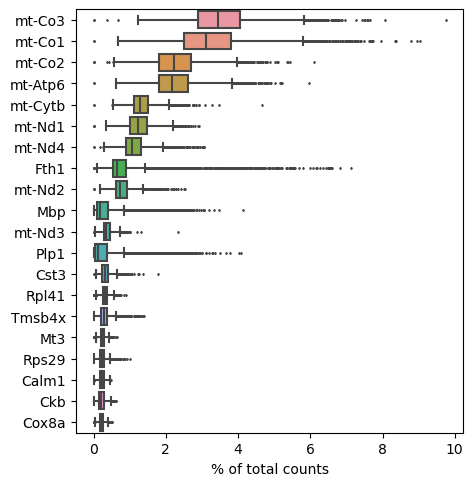

In [14]:
sc.pl.highest_expr_genes(adata, n_top=20)


In [15]:

# Convert the sparse matrix to a dense matrix
dense_matrix = adata.X.toarray()

# Print the dense matrix
print(dense_matrix)

[[2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
cell_index = 0  # Index of the cell you want to examine

# Access the expression data for the specific cell
gene_expression = adata.X[cell_index]

# Get the indices of the genes with non-zero expression in the cell
expressed_gene_indices = gene_expression.nonzero()[1]

# Access the gene names from the 'var_names' attribute
expressed_genes = adata.var_names[expressed_gene_indices]

# Print the list of expressed genes in the cell
print(expressed_genes)

Index(['AC149090.1', 'mt-Cytb', 'mt-Nd5', 'mt-Nd4', 'mt-Nd4l', 'mt-Nd3',
       'mt-Co3', 'mt-Atp6', 'mt-Atp8', 'mt-Co2',
       ...
       'Ncoa2', 'A830018L16Rik', 'Cops5', 'Snhg6', '1700034P13Rik', 'Vcpip1',
       'Adhfe1', 'Sntg1', 'Atp6v1h', 'Xkr4'],
      dtype='object', length=4678)


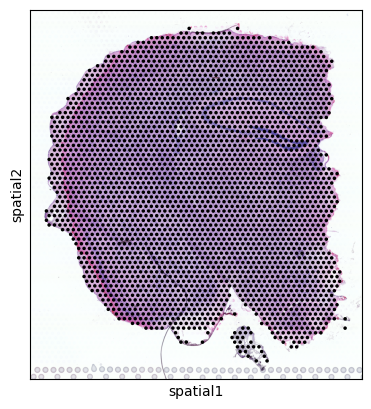

In [23]:
sc.pl.spatial(adata, img_key="hires", alpha=1) #Change alpha to 0 to see the tissue sample or plot by setting color=None


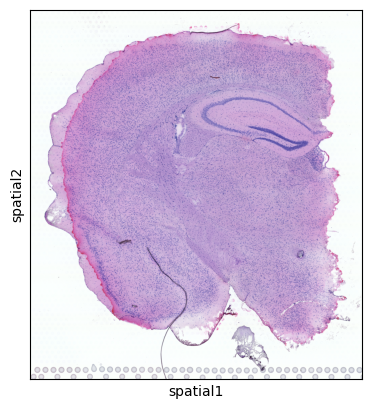

In [18]:
sc.pl.spatial(adata, img_key="hires", color=None)


In [19]:
gene_names = adata.var.index


In [20]:

print("Is Rorb gene present in the vars?", "Rorb" in gene_names)
print("Is Vip gene present in the vars?", "Vip" in gene_names)

Is Rorb gene present in the vars? True
Is Vip gene present in the vars? True


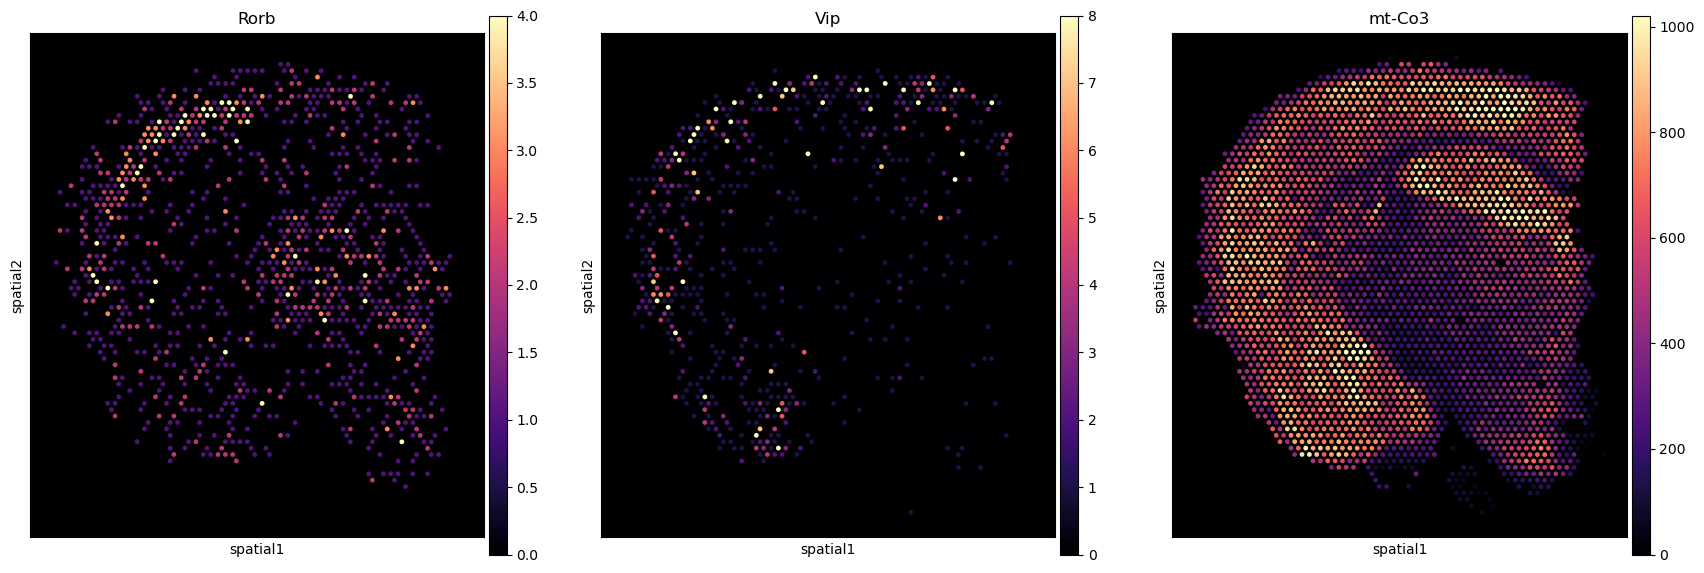

In [21]:
with mpl.rc_context({'figure.figsize': [6,7],
                     'axes.facecolor': 'black'}):
  sc.pl.spatial(adata, color=["Rorb", "Vip", "mt-Co3"], img_key=None, size=1,
                    vmin=0, cmap='magma', vmax='p99.0',
                    gene_symbols='SYMBOL'
                  ) 

In [24]:
sc.pp.calculate_qc_metrics(adata, inplace=True)


In [25]:
adata.var[adata.var.index.str.startswith('mt-')]


gene_ids    feature_types              genome  \
mt-Nd1   ENSMUSG00000064341  Gene Expression  mm10-3.0.0_premrna   
mt-Nd2   ENSMUSG00000064345  Gene Expression  mm10-3.0.0_premrna   
mt-Co1   ENSMUSG00000064351  Gene Expression  mm10-3.0.0_premrna   
mt-Co2   ENSMUSG00000064354  Gene Expression  mm10-3.0.0_premrna   
mt-Atp8  ENSMUSG00000064356  Gene Expression  mm10-3.0.0_premrna   
mt-Atp6  ENSMUSG00000064357  Gene Expression  mm10-3.0.0_premrna   
mt-Co3   ENSMUSG00000064358  Gene Expression  mm10-3.0.0_premrna   
mt-Nd3   ENSMUSG00000064360  Gene Expression  mm10-3.0.0_premrna   
mt-Nd4l  ENSMUSG00000065947  Gene Expression  mm10-3.0.0_premrna   
mt-Nd4   ENSMUSG00000064363  Gene Expression  mm10-3.0.0_premrna   
mt-Nd5   ENSMUSG00000064367  Gene Expression  mm10-3.0.0_premrna   
mt-Nd6   ENSMUSG00000064368  Gene Expression  mm10-3.0.0_premrna   
mt-Cytb  ENSMUSG00000064370  Gene Expression  mm10-3.0.0_premrna   

         n_cells_by_counts  mean_counts  log1p_mean_counts  \
mt-Nd1                2984   182.983261           5.214845   
mt-Nd2                2984   112.724808           4.733781   
mt-Co1                2985   474.385345           6.164126   
mt-Co2                2984   332.904572           5.810855   
mt-Atp8               2839     4.466689           1.698673   
mt-Atp6               2985   327.642120           5.794970   
mt-Co3                2985   519.730835           6.255233   
mt-Nd3                2984    52.348511           3.976846   
mt-Nd4l               2940     6.534316           2.019468   
mt-Nd4                2985   164.248749           5.107452   
mt-Nd5                2977    21.628725           3.119220   
mt-Nd6                 768     0.318714           0.276657   
mt-Cytb               2985   197.986267           5.293236   

         pct_dropout_by_counts  total_counts  log1p_total_counts  
mt-Nd1                0.100435      546571.0           13.211421  
mt-Nd2                0.100435      336709.0           12.726977  
mt-Co1                0.066957     1416989.0           14.164045  
mt-Co2                0.100435      994386.0           13.809882  
mt-Atp8               4.954804       13342.0            9.498747  
mt-Atp6               0.066957      978667.0           13.793948  
mt-Co3                0.066957     1552436.0           14.255337  
mt-Nd3                0.100435      156365.0           11.959954  
mt-Nd4l               1.573485       19518.0            9.879144  
mt-Nd4                0.066957      490611.0           13.103409  
mt-Nd5                0.334784       64605.0           11.076062  
mt-Nd6               74.288584         952.0            6.859615  
mt-Cytb               0.066957      591385.0           13.290224

In [26]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")


In [27]:
adata.var


gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                n_cells_by_counts  mean_counts  log1p_mean_counts  \
Xkr4                          672     0.275527           0.243360   
Gm1992                          2     0.000670           0.000669   
Gm37381                         0     0.000000           0.000000   
Rp1                             8     0.002678           0.002675   
Sox17                         126     0.044191           0.043243   
...                           ...          ...                ...   
AC168977.1                      0     0.000000           0.000000   
AC149090.1                   1524     0.933713           0.659442   
CAAA01118383.1                567     0.222631           0.201005   
Vmn2r122                        0     0.000000           0.000000   
CAAA01147332.1                  2     0.000670           0.000669   

                pct_dropout_by_counts  total_counts  log1p_total_counts     mt  
Xkr4                        77.502511         823.0            6.714170  False  
Gm1992                      99.933043           2.0            1.098612  False  
Gm37381                    100.000000           0.0            0.000000  False  
Rp1                         99.732173           8.0            2.197225  False  
Sox17                       95.781721         132.0            4.890349  False  
...                               ...           ...                 ...    ...  
AC168977.1                 100.000000           0.0            0.000000  False  
AC149090.1                  48.978909        2789.0            7.933797  False  
CAAA01118383.1              81.017744         665.0            6.501290  False  
Vmn2r122                   100.000000           0.0            0.000000  False  
CAAA01147332.1              99.933043           2.0            1.098612  False  

[31053 rows x 10 columns]

In [31]:
ribo_genes = pd.read_csv('D:\\mouse_brain_visium_wo_cloupe_data\\mouse_brain_visium_wo_cloupe_data\\rawdata\\ST8059048\\KEGG_RIBOSOME.v2023.2.Hs.csv', skiprows=2, header=None)
ribo_genes
     

0
0          FAU
1       MRPL13
2        RPL10
3       RPL10A
4       RPL10L
..         ...
83        RPS9
84        RPSA
85     RSL24D1
86  RSL24D1P11
87       UBA52

[88 rows x 1 columns]

In [32]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)


In [33]:
adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                n_cells_by_counts  mean_counts  log1p_mean_counts  \
Xkr4                          672     0.275527           0.243360   
Gm1992                          2     0.000670           0.000669   
Gm37381                         0     0.000000           0.000000   
Rp1                             8     0.002678           0.002675   
Sox17                         126     0.044191           0.043243   
...                           ...          ...                ...   
AC168977.1                      0     0.000000           0.000000   
AC149090.1                   1524     0.933713           0.659442   
CAAA01118383.1                567     0.222631           0.201005   
Vmn2r122                        0     0.000000           0.000000   
CAAA01147332.1                  2     0.000670           0.000669   

                pct_dropout_by_counts  total_counts  log1p_total_counts  \
Xkr4                        77.502511         823.0            6.714170   
Gm1992                      99.933043           2.0            1.098612   
Gm37381                    100.000000           0.0            0.000000   
Rp1                         99.732173           8.0            2.197225   
Sox17                       95.781721         132.0            4.890349   
...                               ...           ...                 ...   
AC168977.1                 100.000000           0.0            0.000000   
AC149090.1                  48.978909        2789.0            7.933797   
CAAA01118383.1              81.017744         665.0            6.501290   
Vmn2r122                   100.000000           0.0            0.000000   
CAAA01147332.1              99.933043           2.0            1.098612   

                   mt   ribo  
Xkr4            False  False  
Gm1992          False  False  
Gm37381         False  False  
Rp1             False  False  
Sox17           False  False  
...               ...    ...  
AC168977.1      False  False  
AC149090.1      False  False  
CAAA01118383.1  False  False  
Vmn2r122        False  False  
CAAA01147332.1  False  False  

[31053 rows x 11 columns]

In [34]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo'
    uns: 'spatial'
    obsm: 'spatial'

In [35]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", 'ribo'], inplace=True)


In [36]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo'
    uns: 'spatial'
    obsm: 'spatial'

In [37]:

number_of_spots = adata.obs_names.shape[0]
mean_reads_per_spot = adata.obs['total_counts'].mean()
median_genes_per_spot = adata.obs['n_genes_by_counts'].median()

print("Number of spots under tissue:", number_of_spots)
print("Mean reads per spot:", mean_reads_per_spot)
print("Median genes per spot:", median_genes_per_spot)

Number of spots under tissue: 2987
Mean reads per spot: 15484.307
Median genes per spot: 4553.0


In [38]:
adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                n_cells_by_counts  mean_counts  log1p_mean_counts  \
Xkr4                          672     0.275527           0.243360   
Gm1992                          2     0.000670           0.000669   
Gm37381                         0     0.000000           0.000000   
Rp1                             8     0.002678           0.002675   
Sox17                         126     0.044191           0.043243   
...                           ...          ...                ...   
AC168977.1                      0     0.000000           0.000000   
AC149090.1                   1524     0.933713           0.659442   
CAAA01118383.1                567     0.222631           0.201005   
Vmn2r122                        0     0.000000           0.000000   
CAAA01147332.1                  2     0.000670           0.000669   

                pct_dropout_by_counts  total_counts  log1p_total_counts  \
Xkr4                        77.502511         823.0            6.714170   
Gm1992                      99.933043           2.0            1.098612   
Gm37381                    100.000000           0.0            0.000000   
Rp1                         99.732173           8.0            2.197225   
Sox17                       95.781721         132.0            4.890349   
...                               ...           ...                 ...   
AC168977.1                 100.000000           0.0            0.000000   
AC149090.1                  48.978909        2789.0            7.933797   
CAAA01118383.1              81.017744         665.0            6.501290   
Vmn2r122                   100.000000           0.0            0.000000   
CAAA01147332.1              99.933043           2.0            1.098612   

                   mt   ribo  
Xkr4            False  False  
Gm1992          False  False  
Gm37381         False  False  
Rp1             False  False  
Sox17           False  False  
...               ...    ...  
AC168977.1      False  False  
AC149090.1      False  False  
CAAA01118383.1  False  False  
Vmn2r122        False  False  
CAAA01147332.1  False  False  

[31053 rows x 11 columns]

In [39]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4678   
AAACACCAATAACTGC-1          1         59         19               3549   
AAACAGAGCGACTCCT-1          1         14         94               6779   
AAACAGCTTTCAGAAG-1          1         43          9               3108   
AAACAGGGTCTATATT-1          1         47         13               4515   
...                       ...        ...        ...                ...   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
TTGTTGTGTGTCAAGA-1          1         31         77               3464   
TTGTTTCACATCCAGG-1          1         58         42               5457   
TTGTTTCATTAGTCTA-1          1         60         30               5300   
TTGTTTCCATACAACT-1          1         45         27               5143   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.450840       14284.0            9.566965   
AAACACCAATAACTGC-1                 8.174703        9951.0            9.205529   
AAACAGAGCGACTCCT-1                 8.821732       32155.0           10.378354   
AAACAGCTTTCAGAAG-1                 8.042056        7935.0            8.979165   
AAACAGGGTCTATATT-1                 8.415382       14483.0            9.580800   
...                                     ...           ...                 ...   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
TTGTTGTGTGTCAAGA-1                 8.150468        8785.0            9.080914   
TTGTTTCACATCCAGG-1                 8.604838       19956.0            9.901335   
TTGTTTCATTAGTCTA-1                 8.575651       18351.0            9.817493   
TTGTTTCCATACAACT-1                 8.545586       17529.0            9.771669   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   27.457295                    32.812938   
AAACACCAATAACTGC-1                   37.061602                    42.337454   
AAACAGAGCGACTCCT-1                   23.784792                    29.830508   
AAACAGCTTTCAGAAG-1                   32.917454                    39.054820   
AAACAGGGTCTATATT-1                   30.994960                    36.415107   
...                                        ...                          ...   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
TTGTTGTGTGTCAAGA-1                   27.137166                    33.249858   
TTGTTTCACATCCAGG-1                   23.872520                    29.695330   
TTGTTTCATTAGTCTA-1                   24.892376                    30.477903   
TTGTTTCCATACAACT-1                   25.415027                    31.330937   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    39.897788                    52.856343   
AAACACCAATAACTGC-1                    49.110642                    60.586876   
AAACAGAGCGACTCCT-1                    37.860364                    51.397916   
AAACAGCTTTCAGAAG-1                    46.389414                    59.206049   
AAACAGGGTCTATATT-1                    43.506180                    56.031209   
...                                         ...                          ...   
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265   
TTGTTGTGTGTCAAGA-1                    41.343199                    55.310188   
TTGTTTCACATCCAGG-1                    37.748046                    51.638605   
TTGTTTCATTAGTCTA-1                    38.194104                    51.670209   
TTGTTTCCATACAACT-1                    39.505962                    53.191853   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACAAGTATCTCCCA-1           2847.0               7.954372      19.931393   
AAACACCAATAACTGC-1           2764.0               7.924796      27.776104   
AAACAGAGCGACTCCT-

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

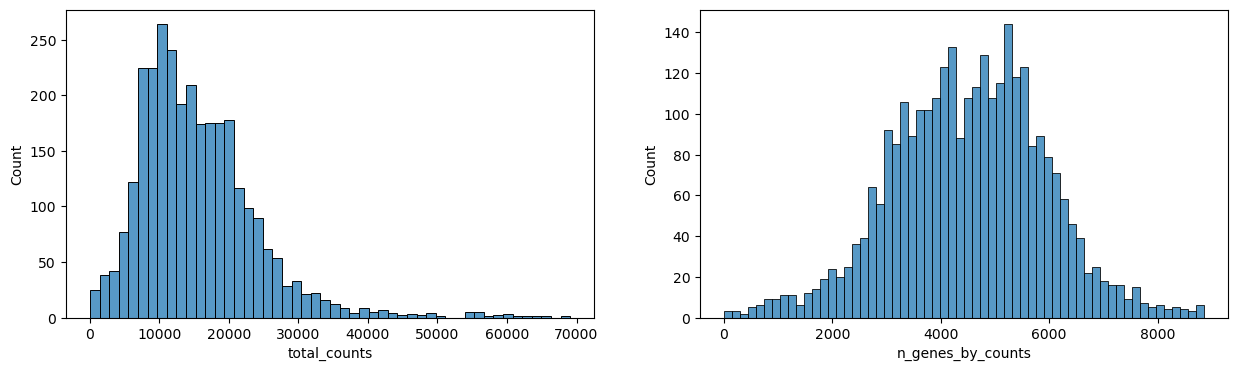

In [40]:

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])

In [41]:
adata.obs.sort_values('total_counts')


in_tissue  array_row  array_col  n_genes_by_counts  \
CACAGTCCCGCTTCGC-1          1         60        112                  3   
AGCGATGCGCCTAATA-1          1         64        108                 38   
AGATACCAATAGAACC-1          1         64        110                 66   
GGAGTTGATTCTGTGT-1          1         68        112                179   
AGAAGAGCGCCGTTCC-1          1         38         88                238   
...                       ...        ...        ...                ...   
CTGACTGCGCAGCTCG-1          1         31        101               8821   
TGGCCAAACTGAAGTA-1          1         28         76               8444   
CTAACGAAACTTGCTG-1          1         30         94               8861   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
CATGGTCTAGATACCG-1          1         26         66               8574   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
CACAGTCCCGCTTCGC-1                 1.386294           3.0            1.386294   
AGCGATGCGCCTAATA-1                 3.663562          43.0            3.784190   
AGATACCAATAGAACC-1                 4.204693          73.0            4.304065   
GGAGTTGATTCTGTGT-1                 5.192957         226.0            5.424950   
AGAAGAGCGCCGTTCC-1                 5.476464         295.0            5.690360   
...                                     ...           ...                 ...   
CTGACTGCGCAGCTCG-1                 9.085004       61512.0           11.027004   
TGGCCAAACTGAAGTA-1                 9.041330       62504.0           11.043002   
CTAACGAAACTTGCTG-1                 9.089528       63739.0           11.062568   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
CATGGTCTAGATACCG-1                 9.056606       69102.0           11.143353   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
CACAGTCCCGCTTCGC-1                  100.000000                   100.000000   
AGCGATGCGCCTAATA-1                  100.000000                   100.000000   
AGATACCAATAGAACC-1                   78.082192                   100.000000   
GGAGTTGATTCTGTGT-1                   42.920354                    65.044248   
AGAAGAGCGCCGTTCC-1                   36.271186                    53.220339   
...                                        ...                          ...   
CTGACTGCGCAGCTCG-1                   17.407985                    23.345038   
TGGCCAAACTGAAGTA-1                   19.035582                    25.241585   
CTAACGAAACTTGCTG-1                   17.661087                    23.684087   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
CATGGTCTAGATACCG-1                   18.657926                    25.209111   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
CACAGTCCCGCTTCGC-1                   100.000000                   100.000000   
AGCGATGCGCCTAATA-1                   100.000000                   100.000000   
AGATACCAATAGAACC-1                   100.000000                   100.000000   
GGAGTTGATTCTGTGT-1                   100.000000                   100.000000   
AGAAGAGCGCCGTTCC-1                    87.118644                   100.000000   
...                                         ...                          ...   
CTGACTGCGCAGCTCG-1                    31.385746                    45.608987   
TGGCCAAACTGAAGTA-1                    33.629848                    48.248112   
CTAACGAAACTTGCTG-1                    31.945904                    45.893409   
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265   
CATGGTCTAGATACCG-1                    33.799311                    48.848080   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
CACAGTCCCGCTTCGC-1              0.0               0.000000       0.000000   
AGCGATGCGCCTAATA-1              5.0               1.791759      11.627908   
AGATACCAATAGAACC-

C:\Users\SRIVATSAL NARAYAN\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


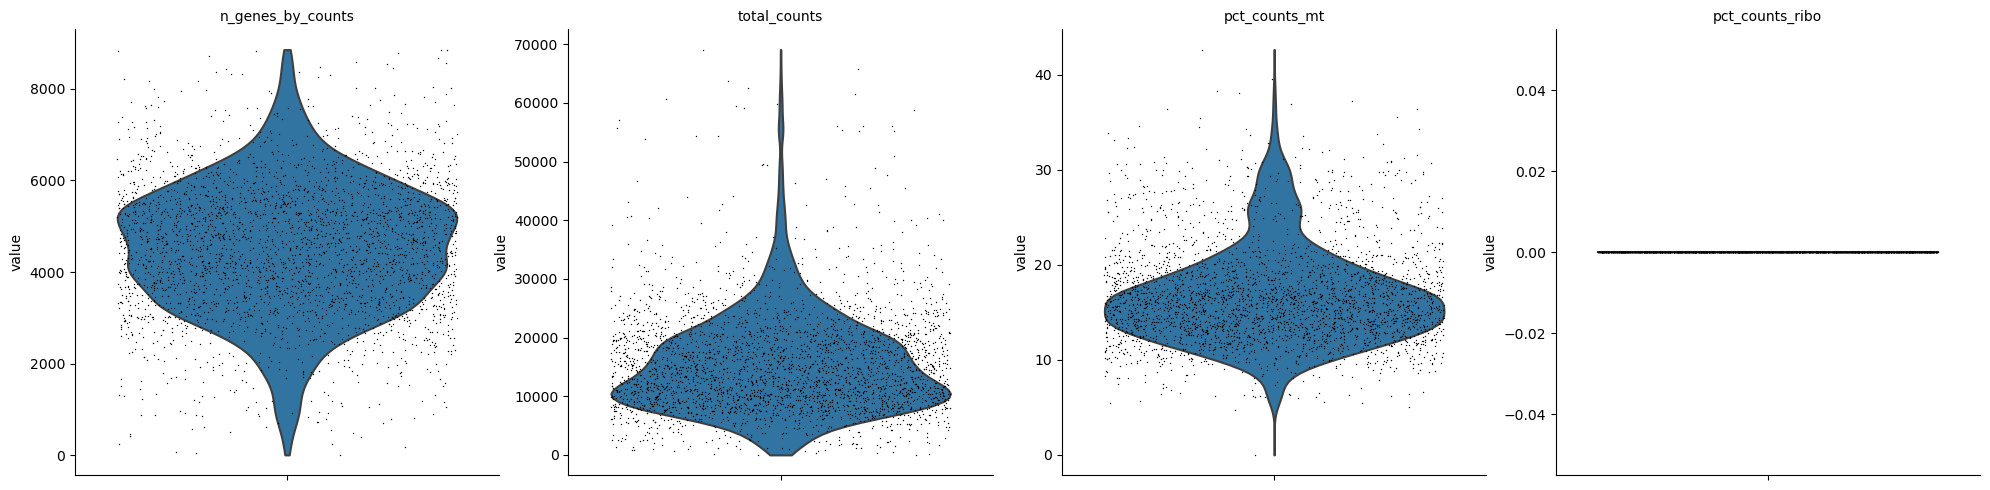

In [42]:

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [47]:
##Let us filter all cells with less than 5000 and more than 35000 counts. Also, retain only cells with 20% percentage of mitochondrial gene counts. Based on the plot, we do not have high percentage of of ribosomal gene counts, but let us add a filter for the sake of completeness.

In [43]:


sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]  
adata = adata[adata.obs["pct_counts_ribo"] < 2]


C:\Users\SRIVATSAL NARAYAN\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


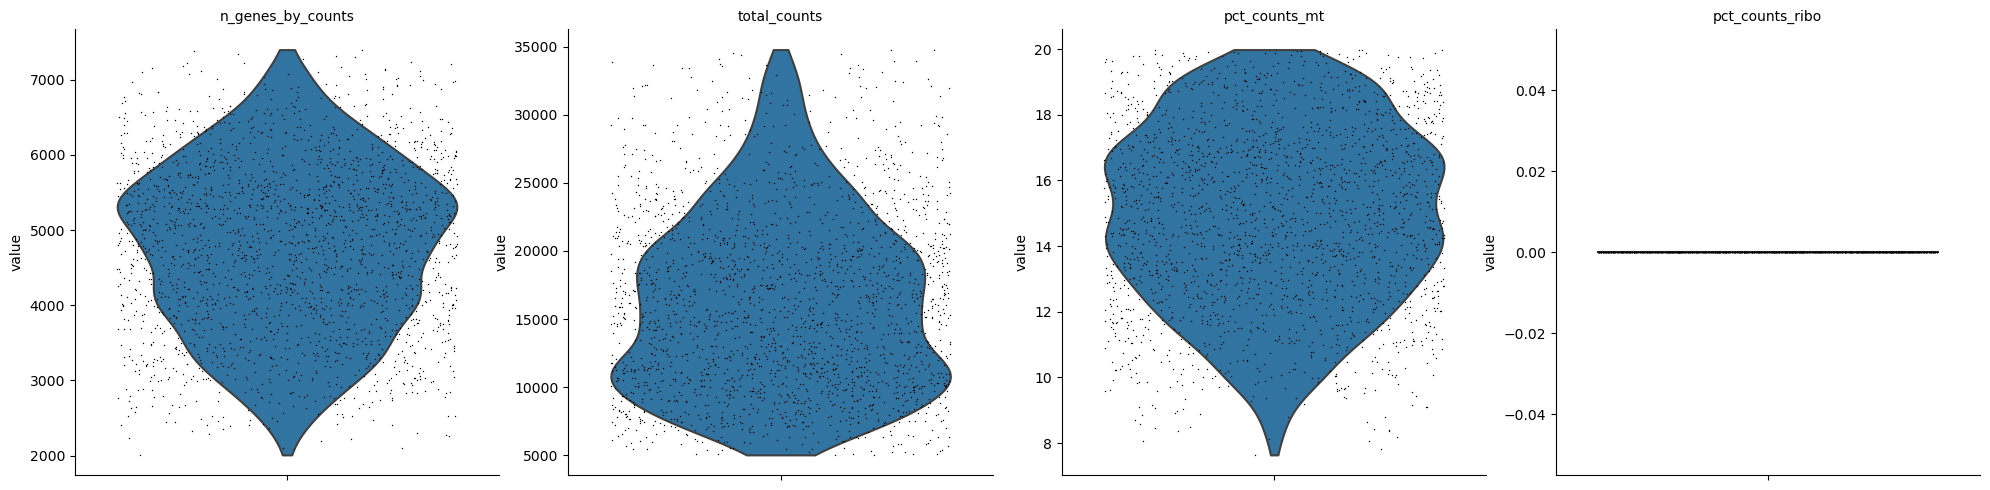

In [44]:

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)


In [48]:
# Sum the gene expression counts across cells
gene_counts_sum = np.sum(adata.X, axis=0)
# Find the gene with the highest sum
gene_with_most_counts = adata.var_names[np.argmax(gene_counts_sum)]
print("Gene with the most counts:", gene_with_most_counts)

Gene with the most counts: mt-Co3


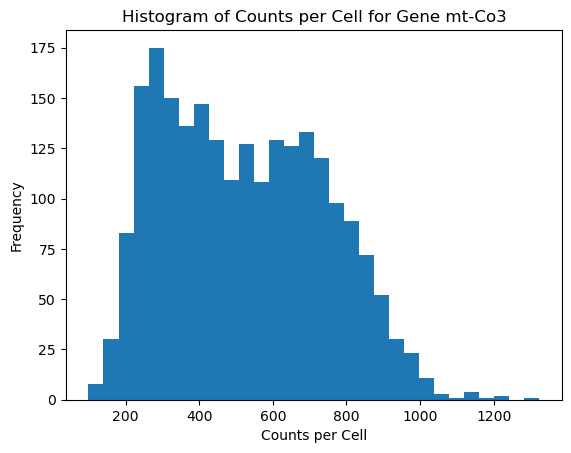

In [49]:
# Specify the gene name
gene_name = 'mt-Co3'

# Get the index of the gene in adata.var_names
gene_index = list(adata.var_names).index(gene_name)

# Extract the gene expression counts for the gene
gene_counts = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_array = gene_counts.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_array, bins=30)
plt.title(f"Histogram of Counts per Cell for Gene {gene_name}")
plt.xlabel("Counts per Cell")
plt.ylabel("Frequency")
plt.show()

In [50]:
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)


C:\Users\SRIVATSAL NARAYAN\anaconda3\envs\myenv\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


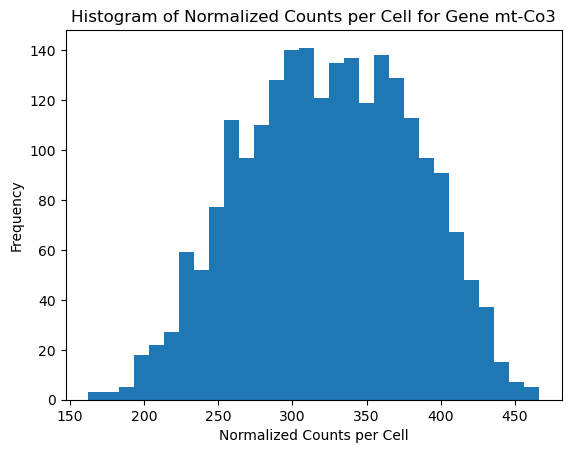

In [51]:
# Get the normalized gene expression counts for the gene
gene_counts_normalized = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_normalized_array = gene_counts_normalized.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_normalized_array, bins=30)
plt.title(f"Histogram of Normalized Counts per Cell for Gene {gene_name}")
plt.xlabel("Normalized Counts per Cell")
plt.ylabel("Frequency")
plt.show()

In [52]:
sc.pp.log1p(adata)


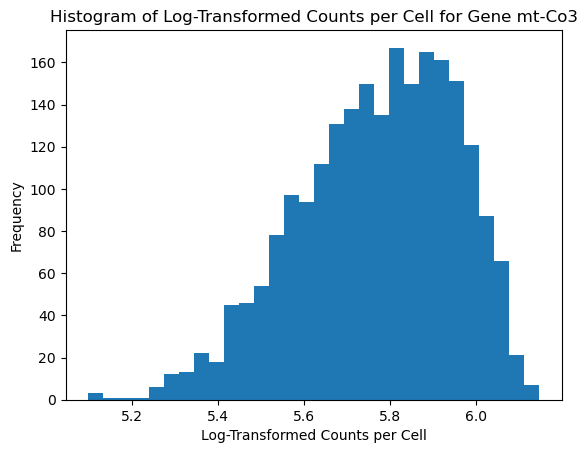

In [53]:

# Get the log-transformed gene expression counts for the gene
gene_counts_log_transformed = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_log_transformed_array = gene_counts_log_transformed.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_log_transformed_array, bins=30)
plt.title(f"Histogram of Log-Transformed Counts per Cell for Gene {gene_name}")
plt.xlabel("Log-Transformed Counts per Cell")
plt.ylabel("Frequency")
plt.show()
     

In [54]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)


In [55]:
adata.var


gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                n_cells_by_counts  mean_counts  log1p_mean_counts  \
Xkr4                          672     0.275527           0.243360   
Gm1992                          2     0.000670           0.000669   
Gm37381                         0     0.000000           0.000000   
Rp1                             8     0.002678           0.002675   
Sox17                         126     0.044191           0.043243   
...                           ...          ...                ...   
AC168977.1                      0     0.000000           0.000000   
AC149090.1                   1524     0.933713           0.659442   
CAAA01118383.1                567     0.222631           0.201005   
Vmn2r122                        0     0.000000           0.000000   
CAAA01147332.1                  2     0.000670           0.000669   

                pct_dropout_by_counts  total_counts  log1p_total_counts  \
Xkr4                        77.502511         823.0            6.714170   
Gm1992                      99.933043           2.0            1.098612   
Gm37381                    100.000000           0.0            0.000000   
Rp1                         99.732173           8.0            2.197225   
Sox17                       95.781721         132.0            4.890349   
...                               ...           ...                 ...   
AC168977.1                 100.000000           0.0            0.000000   
AC149090.1                  48.978909        2789.0            7.933797   
CAAA01118383.1              81.017744         665.0            6.501290   
Vmn2r122                   100.000000           0.0            0.000000   
CAAA01147332.1              99.933043           2.0            1.098612   

                   mt   ribo  highly_variable         means  dispersions  \
Xkr4            False  False             True  1.802254e-01     0.046397   
Gm1992          False  False            False  5.222276e-04    -0.455997   
Gm37381         False  False            False  1.000000e-12          NaN   
Rp1             False  False            False  2.413300e-03    -0.277748   
Sox17           False  False            False  3.074923e-02    -0.167395   
...               ...    ...              ...           ...          ...   
AC168977.1      False  False            False  1.000000e-12          NaN   
AC149090.1      False  False            False  4.417911e-01    -0.263542   
CAAA01118383.1  False  False            False  1.429116e-01    -0.197004   
Vmn2r122        False  False            False  1.000000e-12          NaN   
CAAA01147332.1  False  False            False  5.059125e-04    -0.554695   

                dispersions_norm  
Xkr4                    1.193498  
Gm1992                 -0.646364  
Gm37381                      NaN  
Rp1                     0.006417  
Sox17                   0.410549  
...                          ...  
AC168977.1                   NaN  
AC149090.1             -0.396476  
CAAA01118383.1          0.302115  
Vmn2r122                     NaN  
CAAA01147332.1         -1.007815  

[31053 rows x 15 columns]

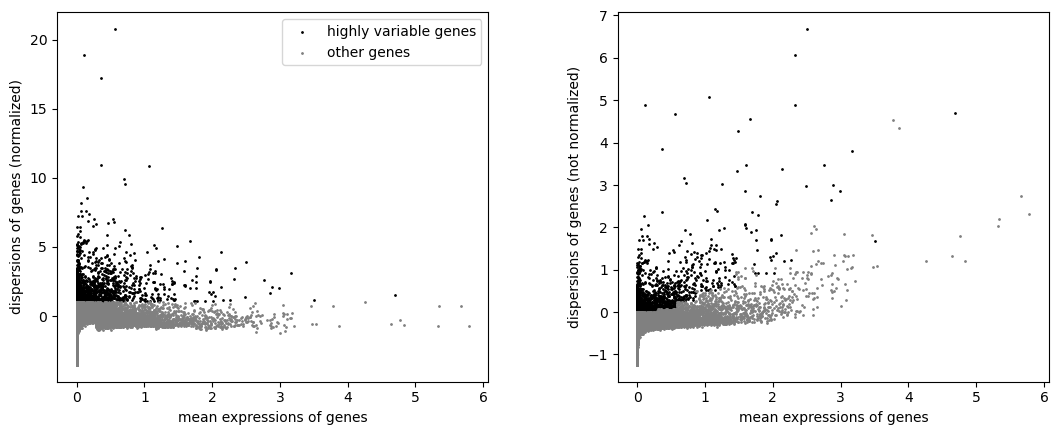

In [56]:
sc.pl.highly_variable_genes(adata)


In [57]:
adata = adata[:, adata.var.highly_variable]


In [58]:
sc.pp.pca(adata) #By default calculates 30 PCAs


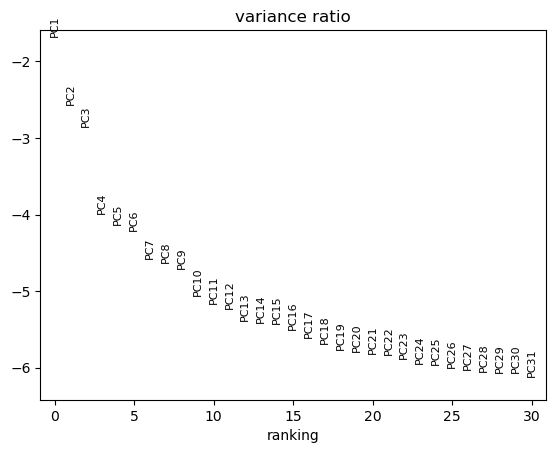

In [59]:
sc.pl.pca_variance_ratio(adata, log=True)


In [60]:
sc.pp.neighbors(adata, n_pcs=20)


C:\Users\SRIVATSAL NARAYAN\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [61]:
sc.tl.umap(adata, n_components=2)


C:\Users\SRIVATSAL NARAYAN\anaconda3\envs\myenv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


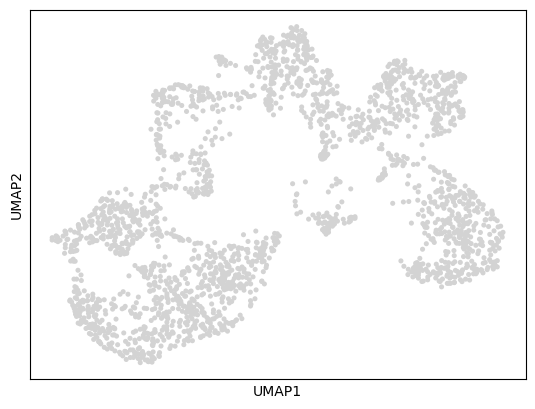

In [62]:
sc.pl.umap(adata)


In [63]:

sorted_by_num_cells = adata.var['n_cells_by_counts'].sort_values(ascending=False)
sorted_by_num_cells

Gm42418          2985
Cst3             2985
Fth1             2982
Malat1           2962
Dbi              2955
                 ... 
Gm28901             1
Gm47757             1
Gm16185             1
4930502A04Rik       1
Gm42849             1
Name: n_cells_by_counts, Length: 2000, dtype: int64

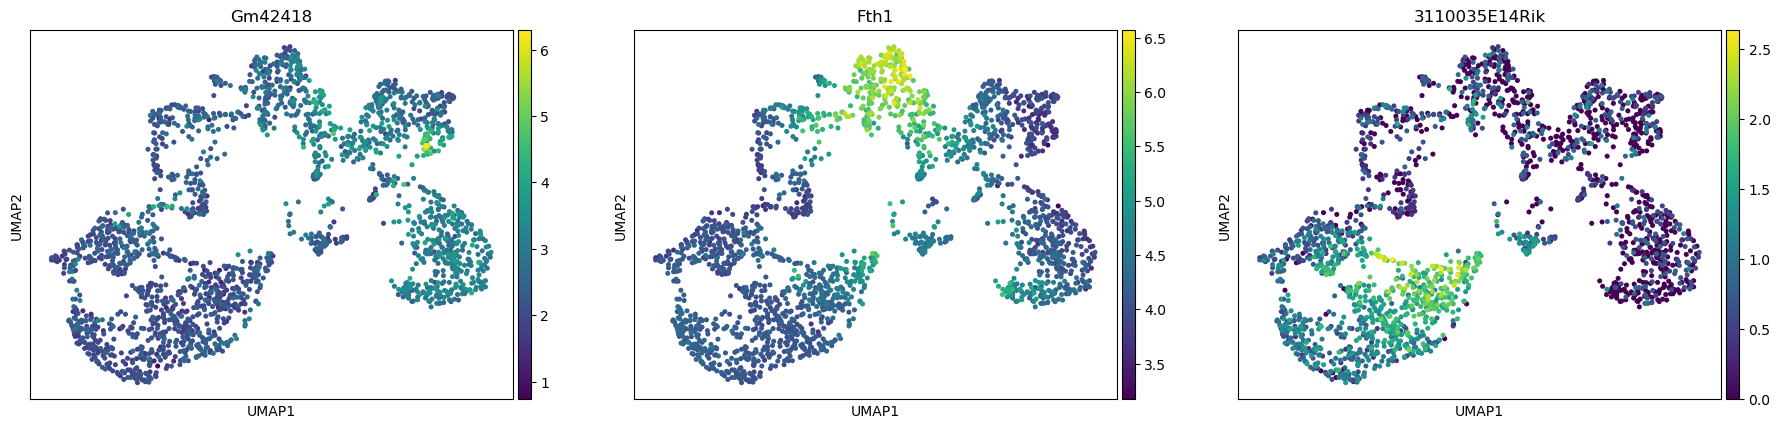

In [64]:
sc.pl.umap(adata, color=["Gm42418", "Fth1", "3110035E14Rik"])


In [65]:
!pip install leidenalg


  Obtaining dependency information for leidenalg from https://files.pythonhosted.org/packages/64/a3/25727f99c7d9bb702d3a77a4431dc378745224bc96a8d5f295810213bf78/leidenalg-0.10.1-cp38-abi3-win_amd64.whl.metadata
  Obtaining dependency information for igraph<0.11,>=0.10.0 from https://files.pythonhosted.org/packages/a4/f4/da53b120e9fff8569f72ff7448f20a2adce0f49aefdddfd97750b097d490/igraph-0.10.8-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for texttable>=1.6.2 from https://files.pythonhosted.org/packages/24/99/4772b8e00a136f3e01236de33b0efda31ee7077203ba5967fcc76da94d65/texttable-1.7.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------- ------------------------- 0.6/1.6 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 16.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ------------------------- -------------- 1.9/2.9 MB 39.7 MB/s

In [66]:
sc.tl.leiden(adata, resolution=0.6, key_added="clusters") #Experiment with values 0.3, 0.6, and 1.0. View the result in the UMAP plot below. 


In [67]:
adata.obs


in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4678   
AAACAGAGCGACTCCT-1          1         14         94               6779   
AAACATTTCCCGGATT-1          1         61         97               5784   
AAACCGGGTAGGTACC-1          1         42         28               6334   
AAACCGTTCGTCCAGG-1          1         52         42               6843   
...                       ...        ...        ...                ...   
TTGTTAGCAAATTCGA-1          1         22         42               5553   
TTGTTGTGTGTCAAGA-1          1         31         77               3464   
TTGTTTCACATCCAGG-1          1         58         42               5457   
TTGTTTCATTAGTCTA-1          1         60         30               5300   
TTGTTTCCATACAACT-1          1         45         27               5143   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.450840       14284.0            9.566965   
AAACAGAGCGACTCCT-1                 8.821732       32155.0           10.378354   
AAACATTTCCCGGATT-1                 8.663024       20669.0            9.936439   
AAACCGGGTAGGTACC-1                 8.753845       27359.0           10.216837   
AAACCGTTCGTCCAGG-1                 8.831128       30272.0           10.318011   
...                                     ...           ...                 ...   
TTGTTAGCAAATTCGA-1                 8.622274       19896.0            9.898324   
TTGTTGTGTGTCAAGA-1                 8.150468        8785.0            9.080914   
TTGTTTCACATCCAGG-1                 8.604838       19956.0            9.901335   
TTGTTTCATTAGTCTA-1                 8.575651       18351.0            9.817493   
TTGTTTCCATACAACT-1                 8.545586       17529.0            9.771669   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   27.457295                    32.812938   
AAACAGAGCGACTCCT-1                   23.784792                    29.830508   
AAACATTTCCCGGATT-1                   21.147612                    27.350138   
AAACCGGGTAGGTACC-1                   22.310757                    28.389196   
AAACCGTTCGTCCAGG-1                   20.025106                    26.149577   
...                                        ...                          ...   
TTGTTAGCAAATTCGA-1                   22.502010                    28.784680   
TTGTTGTGTGTCAAGA-1                   27.137166                    33.249858   
TTGTTTCACATCCAGG-1                   23.872520                    29.695330   
TTGTTTCATTAGTCTA-1                   24.892376                    30.477903   
TTGTTTCCATACAACT-1                   25.415027                    31.330937   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    39.897788                    52.856343   
AAACAGAGCGACTCCT-1                    37.860364                    51.397916   
AAACATTTCCCGGATT-1                    35.744351                    50.374958   
AAACCGGGTAGGTACC-1                    36.496217                    50.506232   
AAACCGTTCGTCCAGG-1                    34.556686                    48.592759   
...                                         ...                          ...   
TTGTTAGCAAATTCGA-1                    36.886811                    50.914757   
TTGTTGTGTGTCAAGA-1                    41.343199                    55.310188   
TTGTTTCACATCCAGG-1                    37.748046                    51.638605   
TTGTTTCATTAGTCTA-1                    38.194104                    51.670209   
TTGTTTCCATACAACT-1                    39.505962                    53.191853   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACAAGTATCTCCCA-1           2847.0               7.954372      19.931393   
AAACAGAGCGACTCCT-1           4866.0               8.490233      15.132950   
AAACATTTCCCGGATT-

C:\Users\SRIVATSAL NARAYAN\anaconda3\envs\myenv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


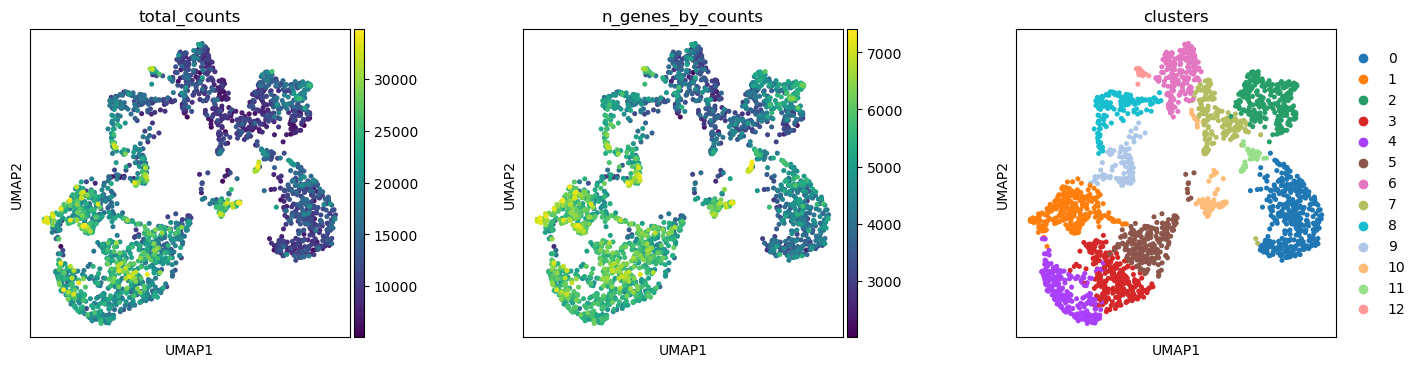

In [68]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)
     

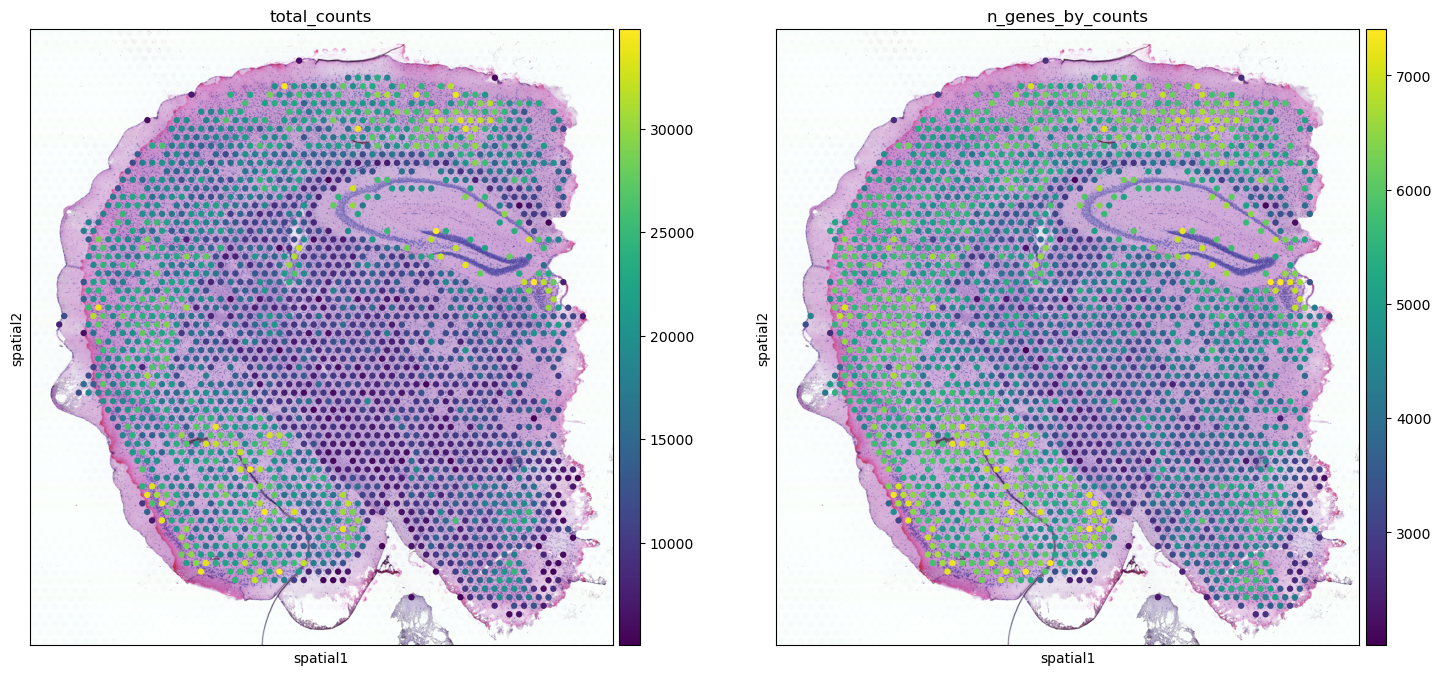

In [69]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])
    

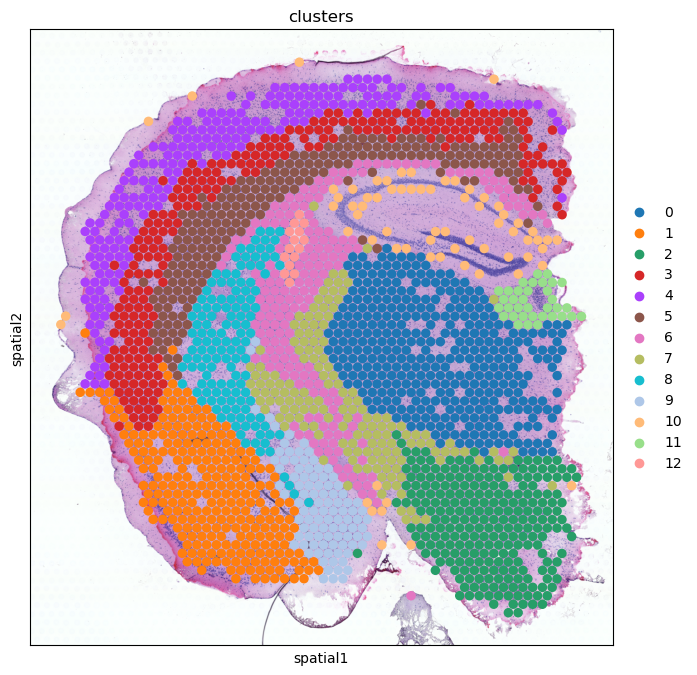

In [70]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

In [71]:

xmin = adata.obsm['spatial'][:, 0].min()
xmax = adata.obsm['spatial'][:, 0].max()
ymin = adata.obsm['spatial'][:, 1].min()
ymax = adata.obsm['spatial'][:, 1].max()

print("x-coordinate range:", xmin, "to", xmax)
print("y-coordinate range:", ymin, "to", ymax)


x-coordinate range: 2278 to 13997
y-coordinate range: 2636 to 15026


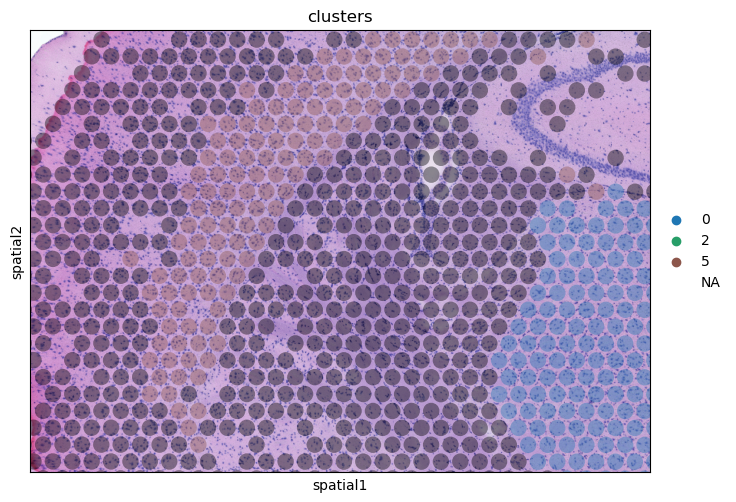

In [72]:

sc.pl.spatial(adata, img_key="hires", color="clusters", groups=["0", "2","5"], crop_coord=[3000, 10000, 5000, 10000], alpha=0.4, size=1.3)  #coord = [xmin, xmax, ymin, ymax]
# To Visualize the underlying image set alpha=0


In [73]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")  #Group by clusters and perform differential gene expression analysis using t-tets (also try 'wilcoxon')


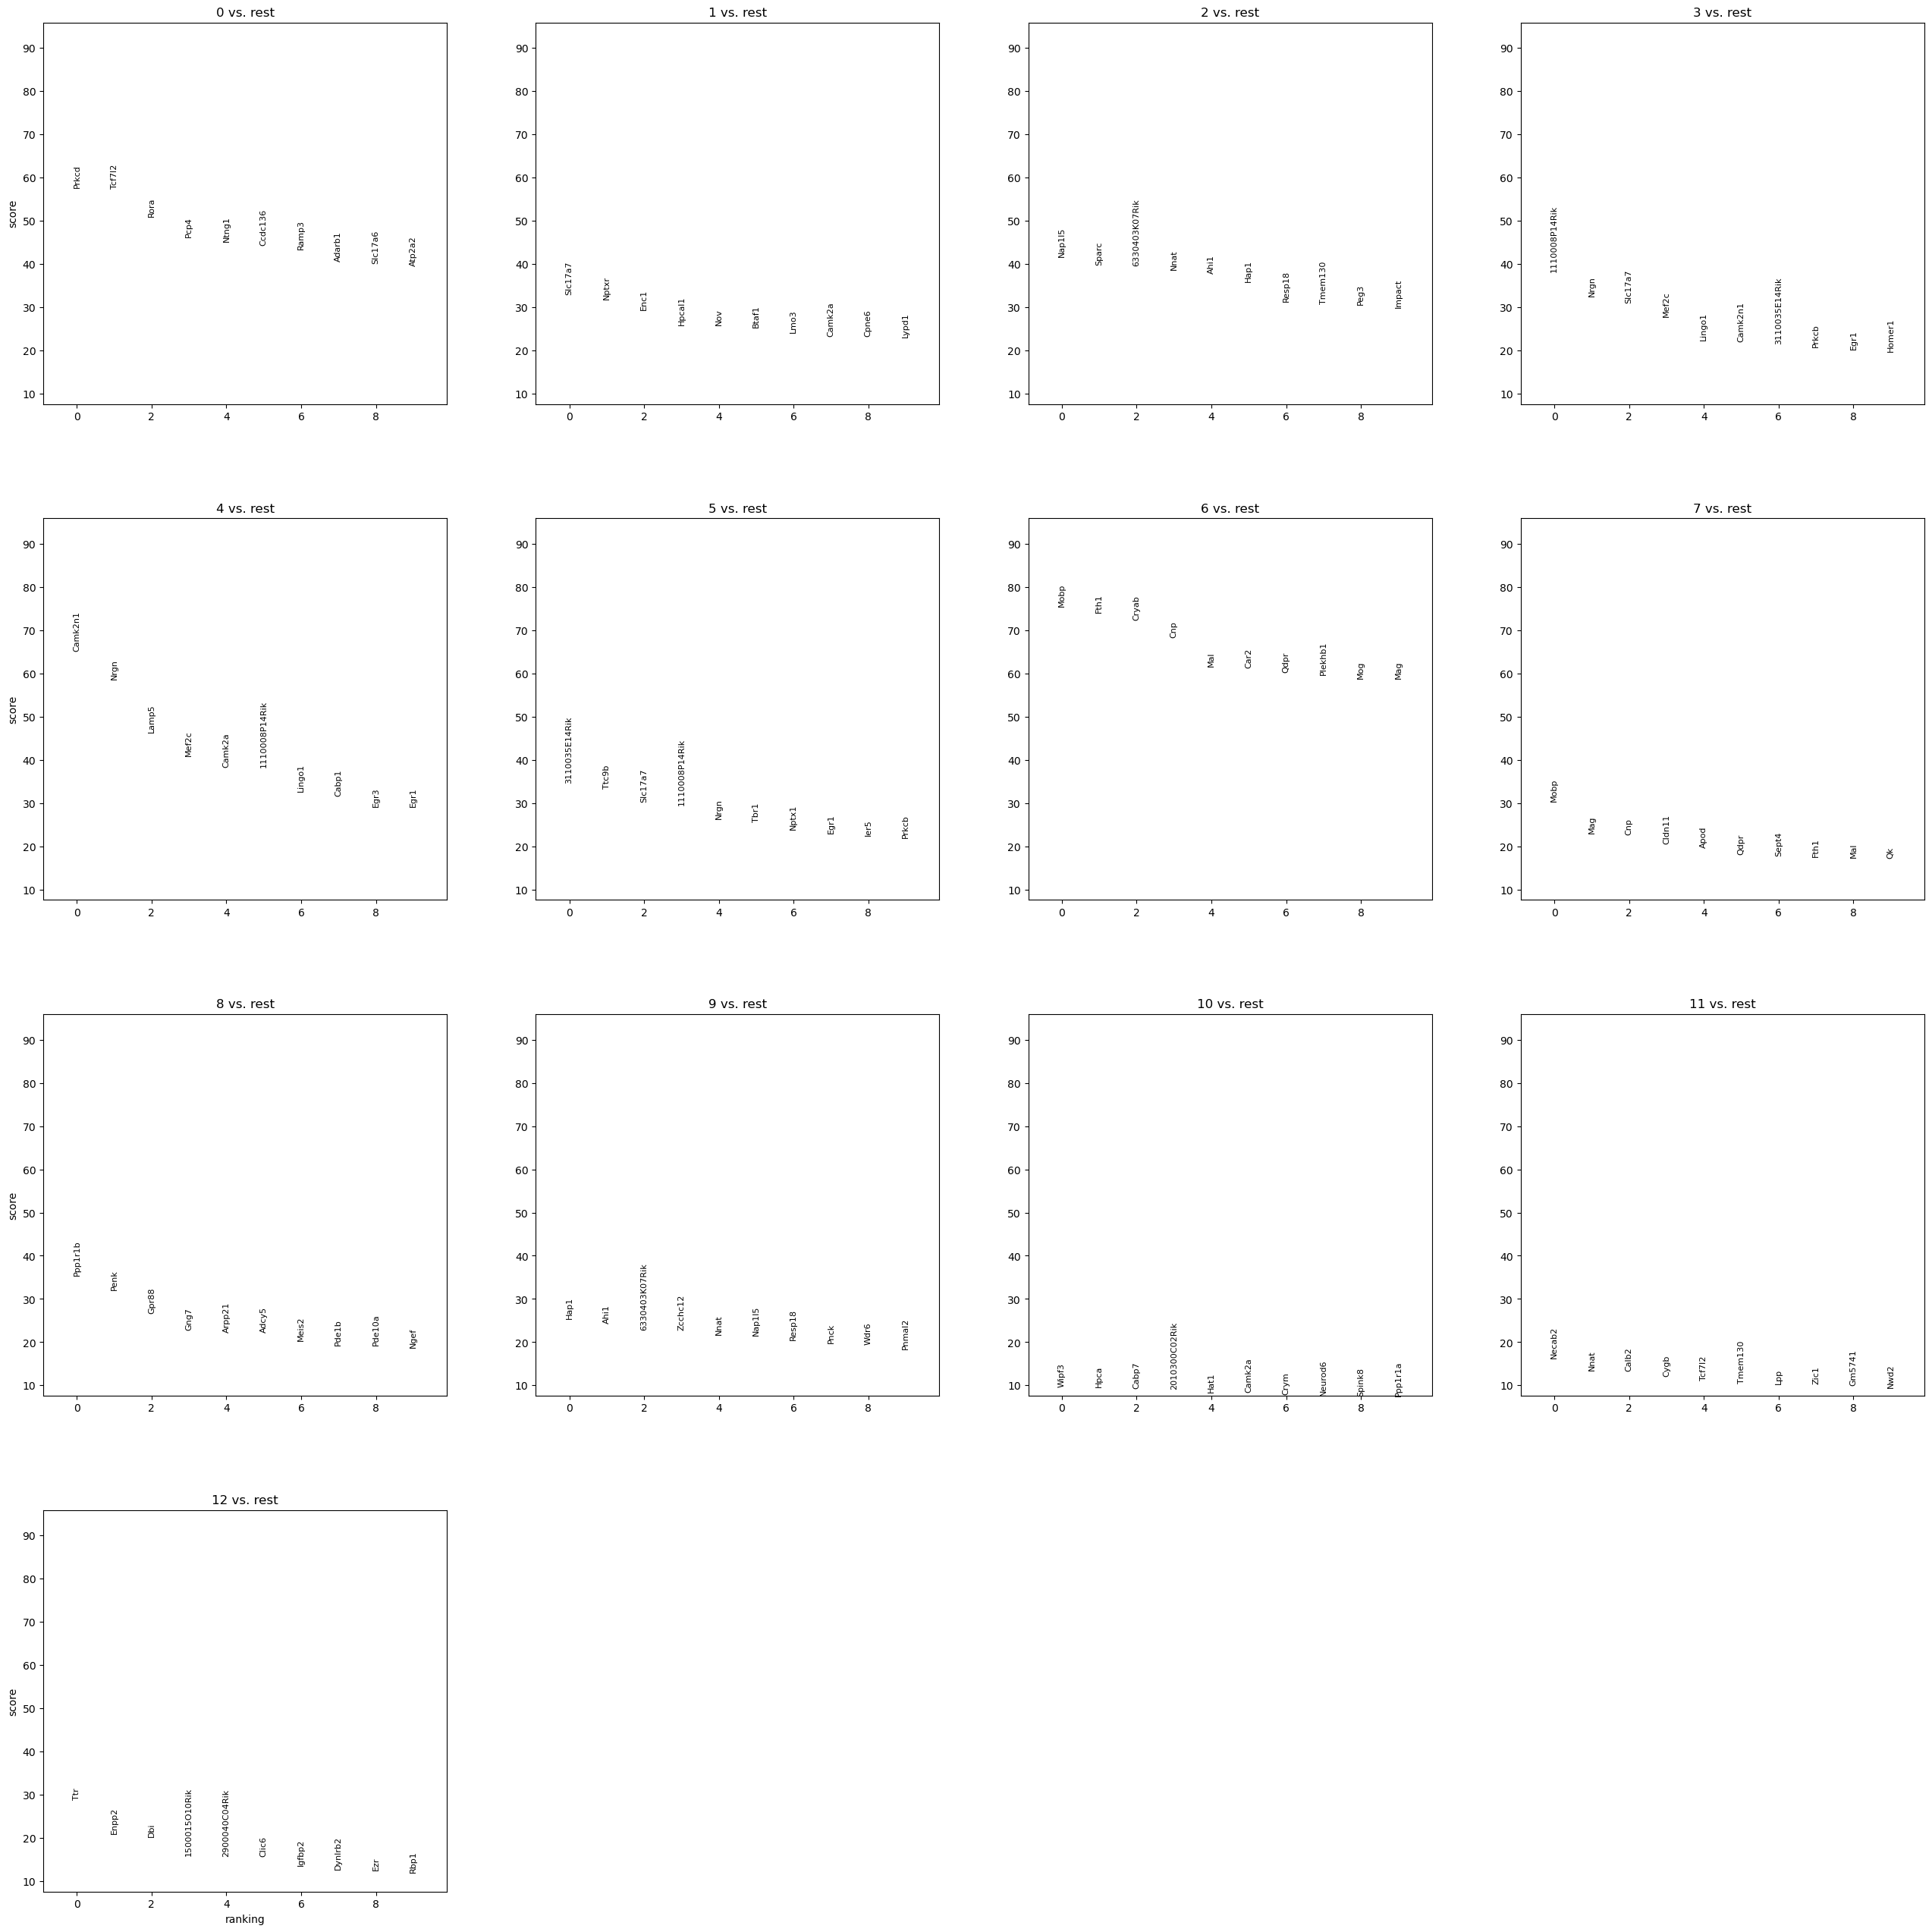

In [74]:
sc.pl.rank_genes_groups(adata, n_genes=10)


categories: 0, 1, 2, etc.
var_group_labels: 6


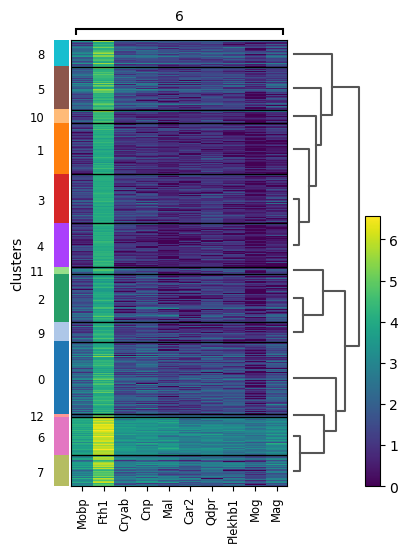

In [75]:
sc.pl.rank_genes_groups_heatmap(adata, groups="6", n_genes=10, groupby="clusters")


KeyError: 'Could not find key Ctxn1 in .var_names or .obs.columns.'

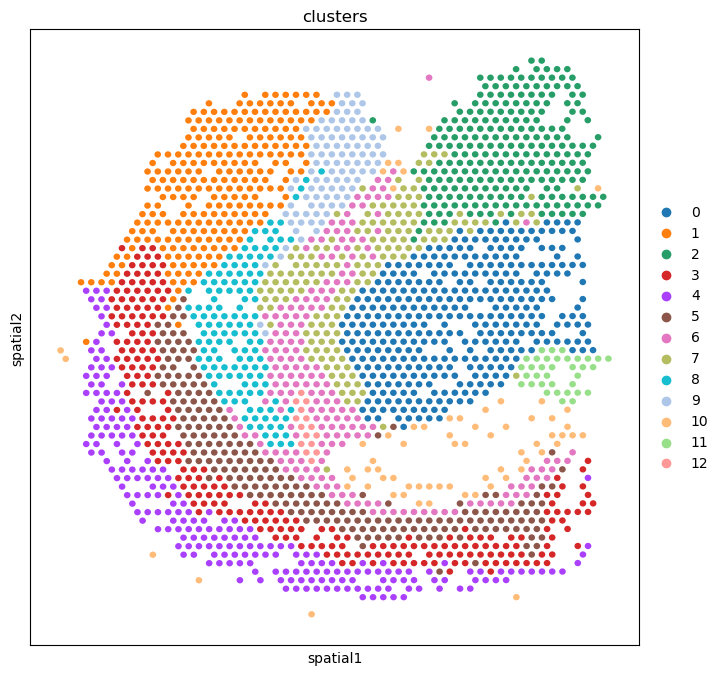

In [77]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["clusters", "Ctxn1"])

In [78]:
# Obtain the top features for each cluster
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
top_features = {}
n_top_genes = 10  # desired number of top genes per cluster
for group in groups:
    top_features[group] = result["names"][group][:n_top_genes]  

# Print the top features for each cluster
for group, features in top_features.items():
    print(f"Cluster {group} top features:")
    for feature in features:
        print(feature)
    print()

Cluster 0 top features:
Prkcd
Tcf7l2
Rora
Pcp4
Ntng1
Ccdc136
Ramp3
Adarb1
Slc17a6
Atp2a2

Cluster 1 top features:
Slc17a7
Nptxr
Enc1
Hpcal1
Nov
Btaf1
Lmo3
Camk2a
Cpne6
Lypd1

Cluster 2 top features:
Nap1l5
Sparc
6330403K07Rik
Nnat
Ahi1
Hap1
Resp18
Tmem130
Peg3
Impact

Cluster 3 top features:
1110008P14Rik
Nrgn
Slc17a7
Mef2c
Lingo1
Camk2n1
3110035E14Rik
Prkcb
Egr1
Homer1

Cluster 4 top features:
Camk2n1
Nrgn
Lamp5
Mef2c
Camk2a
1110008P14Rik
Lingo1
Cabp1
Egr3
Egr1

Cluster 5 top features:
3110035E14Rik
Ttc9b
Slc17a7
1110008P14Rik
Nrgn
Tbr1
Nptx1
Egr1
Ier5
Prkcb

Cluster 6 top features:
Mobp
Fth1
Cryab
Cnp
Mal
Car2
Qdpr
Plekhb1
Mog
Mag

Cluster 7 top features:
Mobp
Mag
Cnp
Cldn11
Apod
Qdpr
Sept4
Fth1
Mal
Qk

Cluster 8 top features:
Ppp1r1b
Penk
Gpr88
Gng7
Arpp21
Adcy5
Meis2
Pde1b
Pde10a
Ngef

Cluster 9 top features:
Hap1
Ahi1
6330403K07Rik
Zcchc12
Nnat
Nap1l5
Resp18
Pnck
Wdr6
Pnmal2

Cluster 10 top features:
Wipf3
Hpca
Cabp7
2010300C02Rik
Hat1
Camk2a
Crym
Neurod6
Spink8
Ppp1r1a

Cluster 1

In [79]:

# Access the marker genes results from rank_genes_groups
marker_genes = adata.uns['rank_genes_groups']

# Iterate over each group and print the marker genes
for group in marker_genes['names'].dtype.names:
    print(f"Group: {group}")
    print(marker_genes['names'][group][:10])  # Print the top 10 marker genes
    print("\n")

Group: 0
['Prkcd' 'Tcf7l2' 'Rora' 'Pcp4' 'Ntng1' 'Ccdc136' 'Ramp3' 'Adarb1'
 'Slc17a6' 'Atp2a2']


Group: 1
['Slc17a7' 'Nptxr' 'Enc1' 'Hpcal1' 'Nov' 'Btaf1' 'Lmo3' 'Camk2a' 'Cpne6'
 'Lypd1']


Group: 2
['Nap1l5' 'Sparc' '6330403K07Rik' 'Nnat' 'Ahi1' 'Hap1' 'Resp18' 'Tmem130'
 'Peg3' 'Impact']


Group: 3
['1110008P14Rik' 'Nrgn' 'Slc17a7' 'Mef2c' 'Lingo1' 'Camk2n1'
 '3110035E14Rik' 'Prkcb' 'Egr1' 'Homer1']


Group: 4
['Camk2n1' 'Nrgn' 'Lamp5' 'Mef2c' 'Camk2a' '1110008P14Rik' 'Lingo1'
 'Cabp1' 'Egr3' 'Egr1']


Group: 5
['3110035E14Rik' 'Ttc9b' 'Slc17a7' '1110008P14Rik' 'Nrgn' 'Tbr1' 'Nptx1'
 'Egr1' 'Ier5' 'Prkcb']


Group: 6
['Mobp' 'Fth1' 'Cryab' 'Cnp' 'Mal' 'Car2' 'Qdpr' 'Plekhb1' 'Mog' 'Mag']


Group: 7
['Mobp' 'Mag' 'Cnp' 'Cldn11' 'Apod' 'Qdpr' 'Sept4' 'Fth1' 'Mal' 'Qk']


Group: 8
['Ppp1r1b' 'Penk' 'Gpr88' 'Gng7' 'Arpp21' 'Adcy5' 'Meis2' 'Pde1b' 'Pde10a'
 'Ngef']


Group: 9
['Hap1' 'Ahi1' '6330403K07Rik' 'Zcchc12' 'Nnat' 'Nap1l5' 'Resp18' 'Pnck'
 'Wdr6' 'Pnmal2']


Group: 10
['Wipf3'